# Import Modules

In [3]:
from math import ceil
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, datasets
import os

import matplotlib.pyplot as plt

import torch.utils.data as td
import torch.nn as nn
import torch.nn.functional as F
from matplotlib import image
from matplotlib import pyplot
from collections import defaultdict

import numpy as np
# from scipy.signal import savgol_filter
import time
from torchvision import models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report
from PIL import Image
import numpy as np
from sklearn.manifold import TSNE
import pickle

import json
from PIL import Image as PilImage

# Setting Path

In [46]:
path = new_path = "/kaggle/input/comp6321-project-datasets/Dataset 2/Dataset 2/Prostate Cancer"
subDirectories = os.listdir(new_path)
#saveFilePath="C:/Users/vshar/Documents/hyperparameters.pkl"
#saveModelPath="C:/Users/vshar/Documents"


# Set Device to GPU

In [6]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


# Reading labels of Dataset

In [47]:
def read_label(subDirectories):
    print(subDirectories)
    enu = range(len(subDirectories))
    labels_map={}
    for enu,subDirectory in enumerate(subDirectories):
        labels_map.update({enu:subDirectory})
    print(labels_map)
    print("The number of labels in the dataset = %s"% len(labels_map))
    print("The \'%s\' device is being used to process the dataset"%device)
    return labels_map

In [48]:
labels_map = read_label(subDirectories)

['tumor', 'gland', 'nongland']
{0: 'tumor', 1: 'gland', 2: 'nongland'}
The number of labels in the dataset = 3
The 'cuda' device is being used to process the dataset


# Display Dataset Images

In [8]:
def displayImages(t_dataset,imageFlag):
    figure = plt.figure(figsize=(8, 8))
    cols, rows = 3, 3
    if imageFlag==0:
      figure.suptitle("Images before preprocessing")
    else:
     figure.suptitle("Images after preprocessing")   
    for i in range(1, cols * rows + 1):
      sample_idx = torch.randint(len(t_dataset), size=(1,)).item()
      img, label = t_dataset[sample_idx]
      img=np.array(img).transpose((1,2,0))
      figure.add_subplot(rows, cols, i)
      plt.title(labels_map[label])
      plt.axis("off")
      plt.imshow(img.squeeze())
    print("\n\n\n################################################\n\n\n")
    plt.show()

# Load Data

In [22]:
def data_loader(data_dir_input,batch_sizeGiven,input_size,flag=0,test_split=1):
# Define dataset directory and transforms
  data_dir = data_dir_input #
  
  data_transform = transforms.Compose([
    transforms.Resize(input_size),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.1,0.1,0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.554, 0.450, 0.343],[0.231, 0.241, 0.241]),
  ])


  if flag==1:
    test_temp_dataset = datasets.ImageFolder(data_dir,transform=transforms.Compose([
    transforms.Resize(input_size),
    transforms.ToTensor(),   
  ]))
    displayImages(test_temp_dataset,0)
    test_temp_dataset = datasets.ImageFolder(data_dir,transform=data_transform)
    displayImages(test_temp_dataset,1)

    data = datasets.ImageFolder(root=data_dir, transform=data_transform)
    # Define train, validation, and test dataset
    dataset_size = len(data)
#     test_size = int(test_split * dataset_size)
#     val_size = int(val_split * dataset_size)
#     train_size = dataset_size - (test_size + val_size)
#     train_dataset, test_dataset, val_dataset = td.random_split(data,[train_size, test_size, val_size])  
    print("Train Datset Size After Split",len(train_dataset))
    print("Test Datset Size After Split",len(test_dataset))
    print("Validation Datset Size After Split",len(val_dataset))


    # Create a dictionary to store the number of images per class
    num_images_per_class = defaultdict(int)

    # Iterate over the training dataset and count the number of images in each class
    for image, label in train_dataset:
        num_images_per_class[label] += 1

    # Print the number of images per class
    for label, num_images in num_images_per_class.items():
        print(f"Class {label}: {num_images} images")
  

    # Define the number of classes and generate a list of colors
    num_classes = len(num_images_per_class)
    colors = plt.cm.Set1(np.linspace(0, 1, num_classes))

    # Plot the number of images per class as a bar plot
    plt.bar(num_images_per_class.keys(), num_images_per_class.values(), color=colors)
    #plt.pie(num_images_per_class.values(), labels=num_images_per_class.keys(), colors=colors, autopct='%1.1f%%')
    # Add axis labels and title
    plt.xlabel("Class")
    plt.ylabel("Number of images")
    plt.title("Number of images per class in the dataset")

    # Create a legend
    labels = [f"Class {label}" for label in num_images_per_class.keys()]
    plt.legend([plt.bar(0, 0, color=colors[i])[0] for i in range(len(num_images_per_class))], labels,loc='center left', bbox_to_anchor=(1, 0.5))
    plt.rcParams["figure.figsize"] = (40,15)
    # Show the plot
    plt.show()
    
    return  

  data = datasets.ImageFolder(root=data_dir, transform=data_transform)
  # Define train, validation, and test dataset
#   dataset_size = len(data)
#   test_size = int(test_split * dataset_size)
#   val_size = int(val_split * dataset_size)
#   train_size = dataset_size - (test_size + val_size)
#   train_dataset, test_dataset, val_dataset = td.random_split(data,[train_size, test_size, val_size])  
 
  #train_loader = DataLoader(train_dataset, batch_size=batch_sizeGiven, shuffle=True, drop_last=False, num_workers=0,pin_memory=True)
  test_loader = DataLoader(data, batch_size=batch_sizeGiven, shuffle=True, drop_last=False, num_workers=0,pin_memory=True) #shuffle 
  #val_loader = DataLoader(val_dataset, batch_size=batch_sizeGiven, shuffle=True, drop_last=False, num_workers=0,pin_memory=True) # shuffle working


  return test_loader

# Data images before and after Preprocessing




################################################





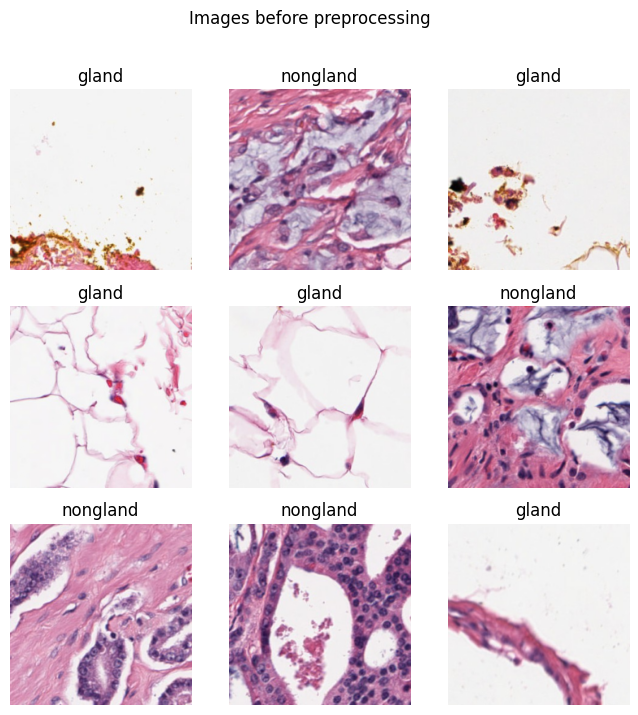




################################################





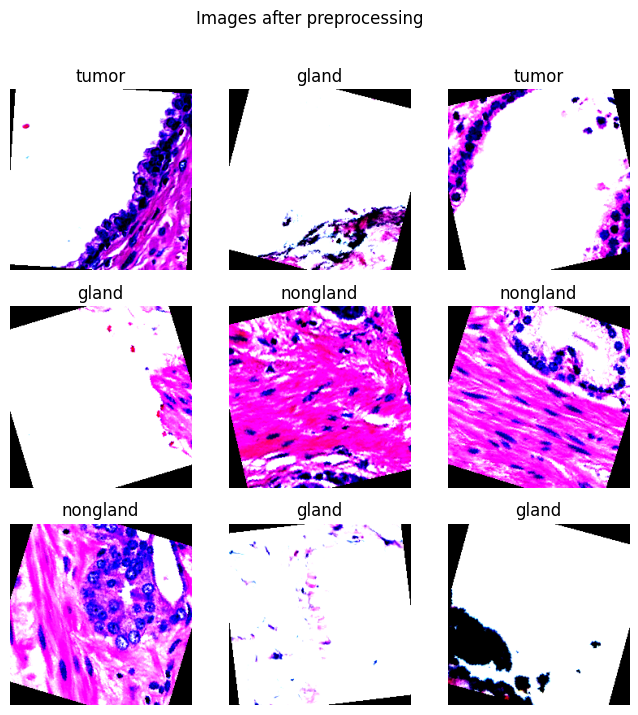

Train Datset Size After Split 0
Test Datset Size After Split 6000
Validation Datset Size After Split 0


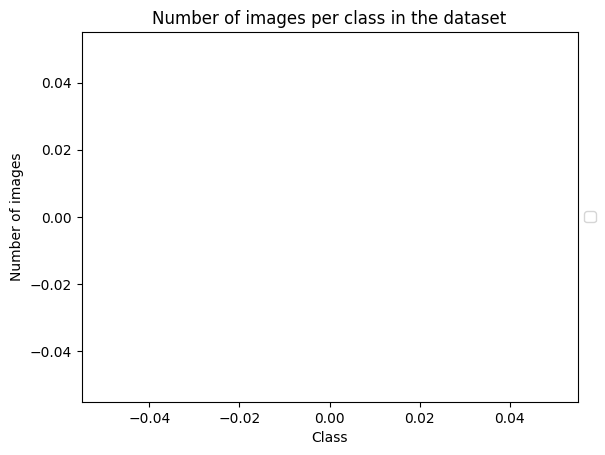

In [10]:
batch_size=32
inputDimension=(224,224)
data_loader(path,batch_size,inputDimension,flag=1)

# Load Model without Transfer Learning

In [16]:
model1 = torch.load('/kaggle/input/models/COMP6321_ResNet_Task1_CancerDataset_Model_Final_HyperParamaterTuning8.pth')
model1.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

# Testing the model

In [18]:
def test(model, device, test_loader):
  model.eval() 
  y_truth=[]
  y_predicted=[]
  cm=[]
  G_correct=0
  G_total=0
  
  with torch.no_grad(): 
      correct = 0
      total = 0
      for data in test_loader:
          images, labels = data[0].to(device), data[1].to(device)
          outputs = model(images)
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
          y_truth+=labels.cpu().numpy().tolist()
          y_predicted+=predicted.cpu().numpy().tolist()
      print('Test Accuracy of the model on the {} test images: {} %'.format(total, (correct / total) * 100))
      cm= confusion_matrix(y_truth,y_predicted)
      G_total=total
      G_correct=correct
  print(classification_report(y_truth,y_predicted))
  return cm,((G_correct / G_total) * 100)

Test Accuracy of the model on the 6000 test images: 35.199999999999996 %
              precision    recall  f1-score   support

           0       0.39      0.98      0.56      2000
           1       0.04      0.02      0.02      2000
           2       0.99      0.06      0.11      2000

    accuracy                           0.35      6000
   macro avg       0.47      0.35      0.23      6000
weighted avg       0.47      0.35      0.23      6000



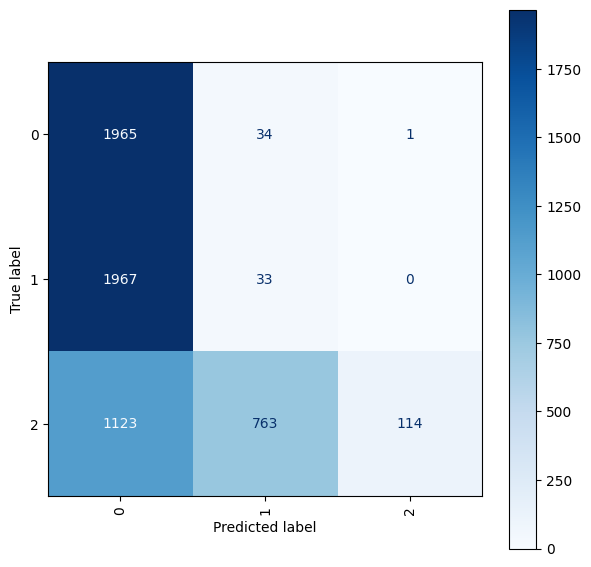

In [24]:
test_loader = data_loader(path,batch_size, inputDimension)
cmReturned,test_accuracy = test(model1,"cuda",test_loader)
test_accuracy_main = []
test_accuracy_main.append(test_accuracy)
if cmReturned is not None:
  fig, ax = plt.subplots(figsize=(7, 7))
  ConfusionMatrixDisplay(cmReturned).plot(ax=ax,cmap='Blues', xticks_rotation='vertical', values_format='d')
  plt.show()  

# T-SNE Plot

In [36]:
# Get embeddings for the test data
def tSNE_plot(temporaryModel):
    embeddings = []
    labels = []
    with torch.no_grad():
        for data in test_loader:
            images, targets = data[0].to(device), data[1].to(device)
            outputs = temporaryModel(images)
            embeddings.append(outputs.cpu().numpy())
            labels.append(targets.cpu().numpy())
    embeddings = np.concatenate(embeddings)
    labels = np.concatenate(labels)

      # Apply t-SNE for visualization
    tsne = TSNE(n_components=2, perplexity=30, random_state=0)
    embeddings_tsne = tsne.fit_transform(embeddings)

      # Plot t-SNE embeddings
    plt.figure(figsize=(30,15))

    for i in range(len(labels_map)):
        plt.scatter(embeddings_tsne[labels==i,0], embeddings_tsne[labels==i,1], label=f'Class {i}')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title('t-SNE Embeddings for Training Data')
    plt.xlabel("t-SNE component 1")
    plt.ylabel("t-SNE component 2")
    plt.show()

# Plot T_SNE for Model1

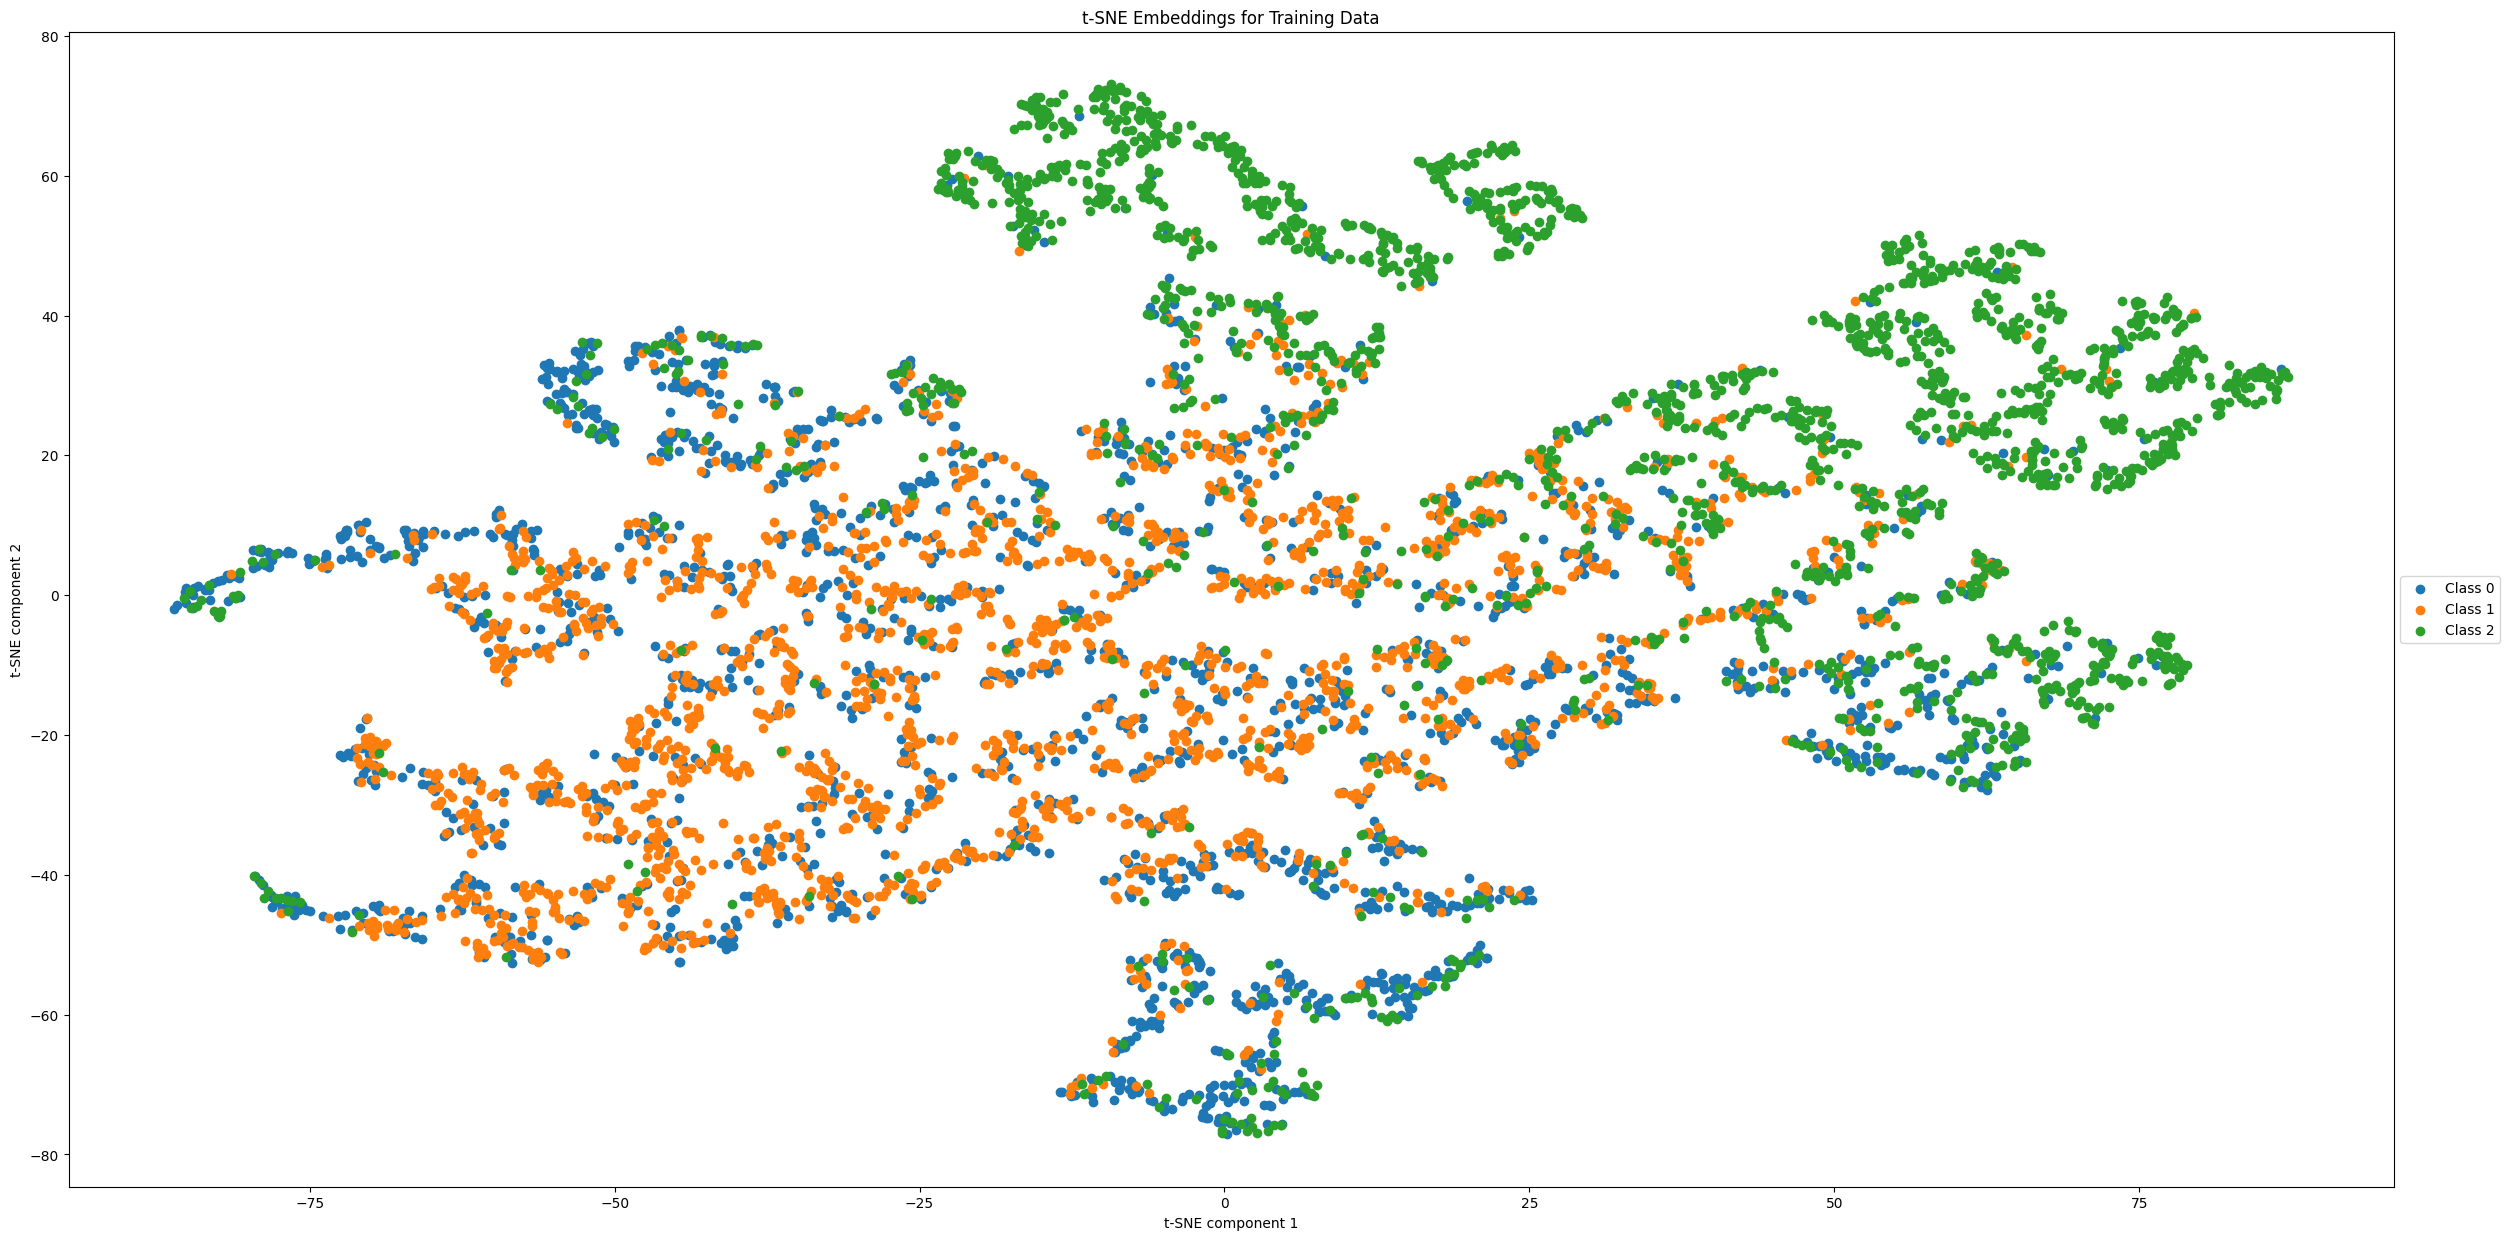

In [37]:
tSNE_plot(model1)

# Load Pretrained Model

In [29]:
model2 = torch.load('/kaggle/input/models/COMP6321_ResNet_Task1_CancerDataset_Model_Final_TransferLearning0.pth')
model2.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

Test Accuracy of the model on the 6000 test images: 40.46666666666667 %
              precision    recall  f1-score   support

           0       0.37      0.89      0.52      2000
           1       0.34      0.13      0.19      2000
           2       0.86      0.19      0.32      2000

    accuracy                           0.40      6000
   macro avg       0.52      0.40      0.34      6000
weighted avg       0.52      0.40      0.34      6000



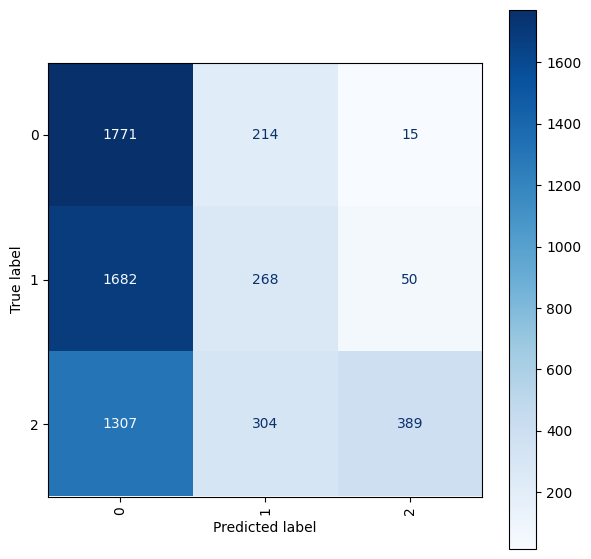

In [30]:
test_loader = data_loader(path,batch_size, inputDimension)
cmReturned,test_accuracy = test(model2,"cuda",test_loader)
test_accuracy_main_2 = []
test_accuracy_main_2.append(test_accuracy)
if cmReturned is not None:
  fig, ax = plt.subplots(figsize=(7, 7))
  ConfusionMatrixDisplay(cmReturned).plot(ax=ax,cmap='Blues', xticks_rotation='vertical', values_format='d')
  plt.show()  

# Plot t_sne for Model_2

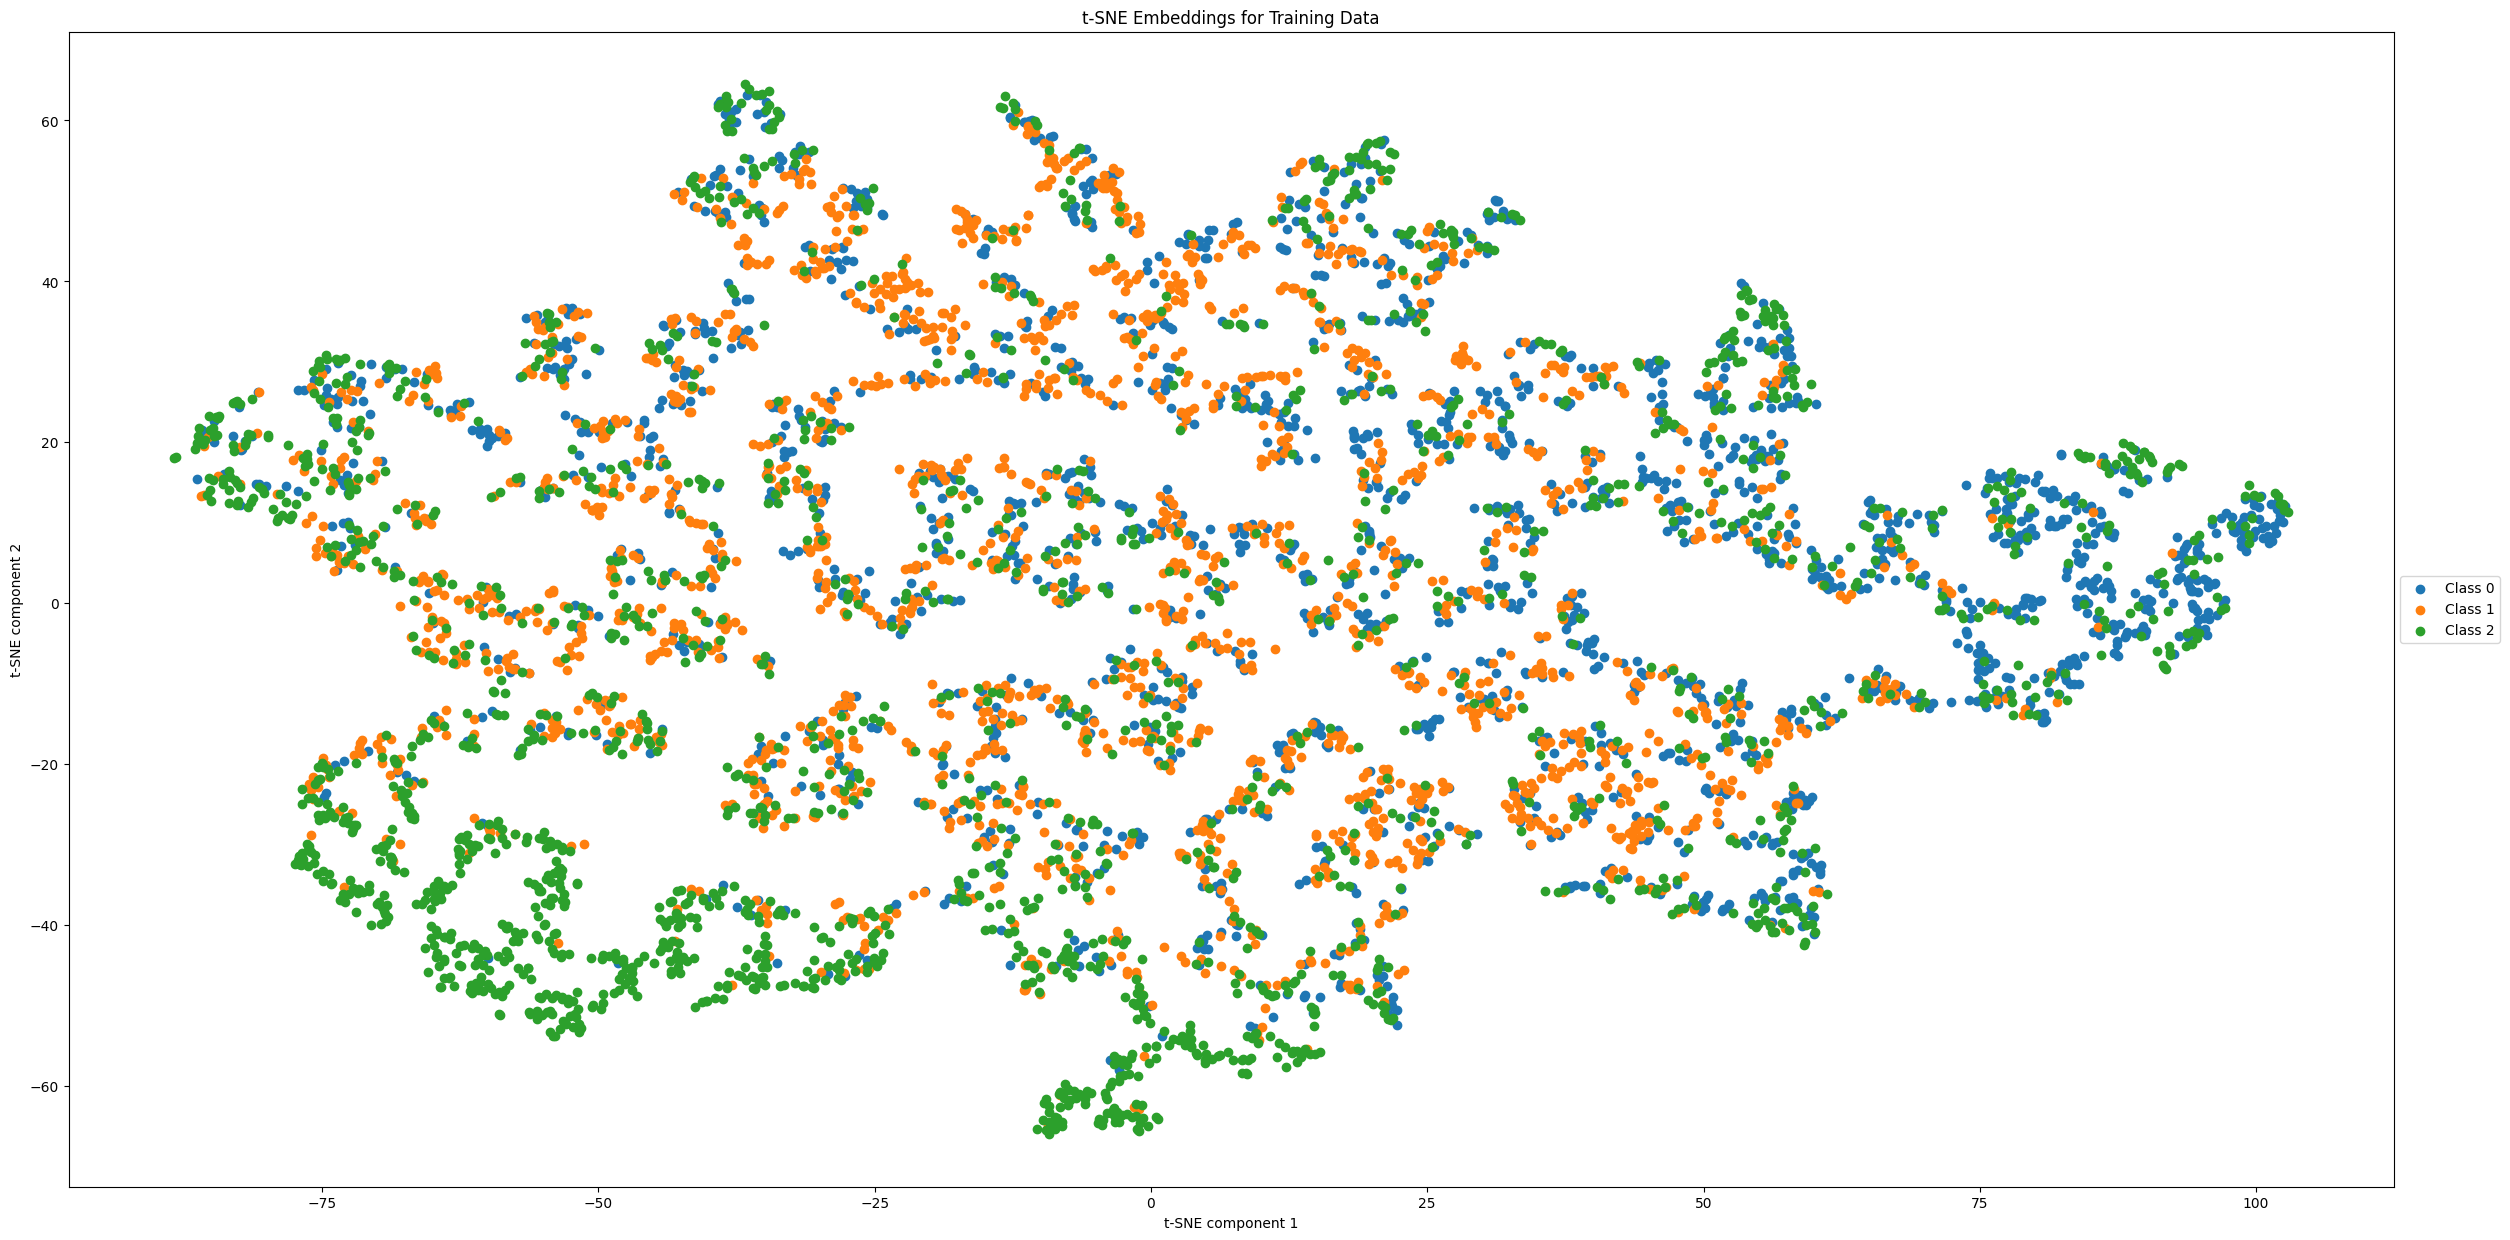

In [39]:
tSNE_plot(model2)

# Dataset-3 Path

In [54]:
path1 = new_path1 = "/kaggle/input/comp6321-project-datasets/Dataset 3/Dataset 3/Animal Faces"
subDirectories1 = os.listdir(new_path1)

# Read Labels for Dataset-3

In [55]:
labels_map = read_label(subDirectories1)

['dog', 'wild', 'cat']
{0: 'dog', 1: 'wild', 2: 'cat'}
The number of labels in the dataset = 3
The 'cuda' device is being used to process the dataset


# Run test on Dataset-3

Test Accuracy of the model on the 6000 test images: 33.58333333333333 %
              precision    recall  f1-score   support

           0       0.31      0.23      0.26      2000
           1       0.34      0.78      0.48      2000
           2       0.20      0.00      0.00      2000

    accuracy                           0.34      6000
   macro avg       0.29      0.34      0.25      6000
weighted avg       0.29      0.34      0.25      6000



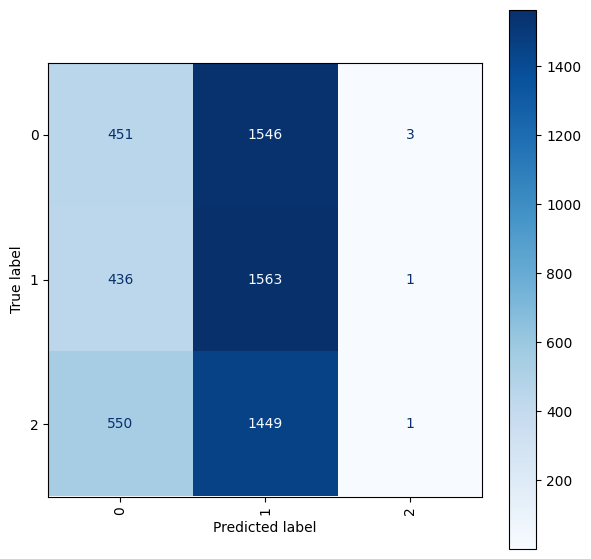

In [56]:
test_loader = data_loader(path1,batch_size, inputDimension)
cmReturned,test_accuracy = test(model1,"cuda",test_loader)
test_accuracy_main_D3M1 = []
test_accuracy_main_D3M1.append(test_accuracy)
if cmReturned is not None:
  fig, ax = plt.subplots(figsize=(7, 7))
  ConfusionMatrixDisplay(cmReturned).plot(ax=ax,cmap='Blues', xticks_rotation='vertical', values_format='d')
  plt.show()

# T_SNE Plot for Dataset3 using Model1

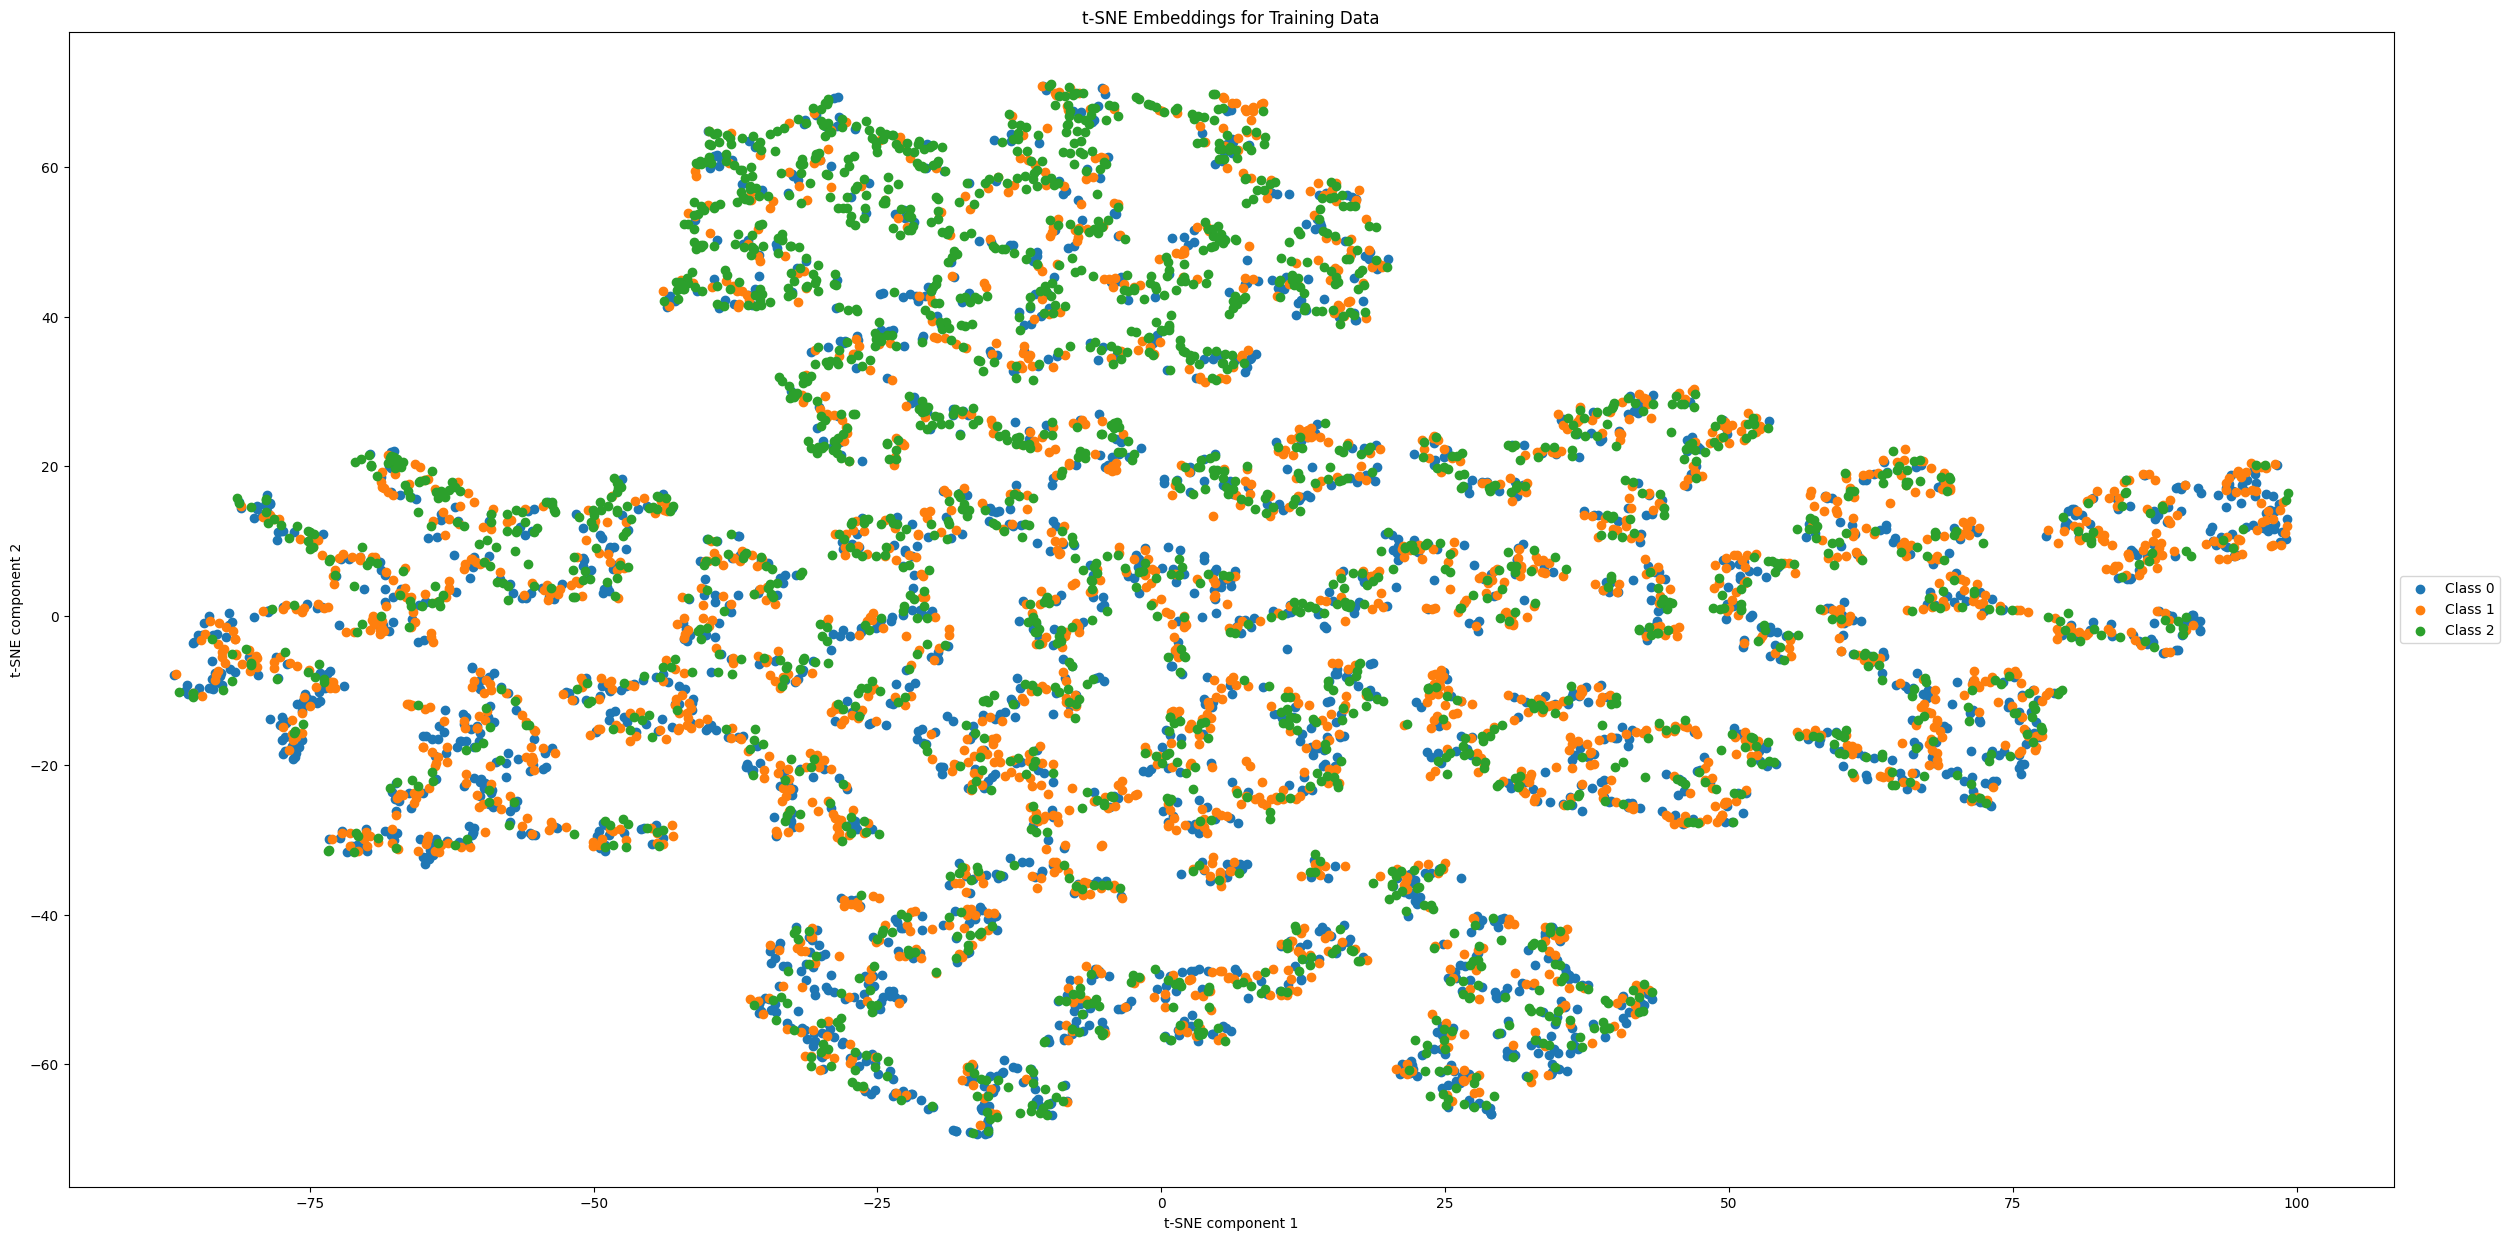

In [57]:
tSNE_plot(model1)

# Run test on Dataset-3 using Pretrained Model

Test Accuracy of the model on the 6000 test images: 39.483333333333334 %
              precision    recall  f1-score   support

           0       0.35      0.88      0.50      2000
           1       0.28      0.03      0.06      2000
           2       0.69      0.27      0.39      2000

    accuracy                           0.39      6000
   macro avg       0.44      0.39      0.32      6000
weighted avg       0.44      0.39      0.32      6000



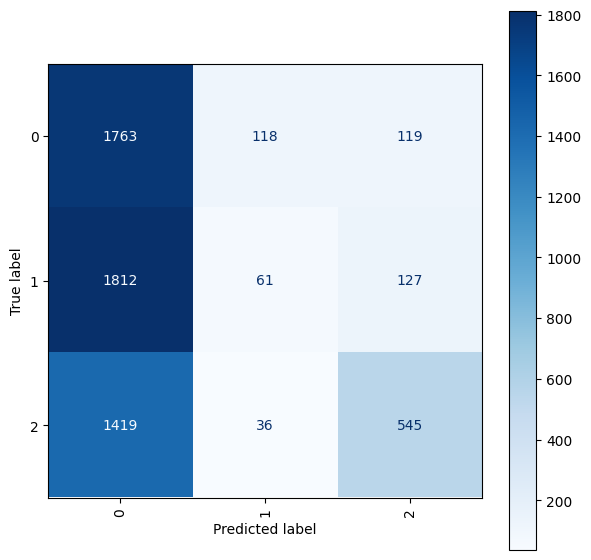

In [64]:
test_loader = data_loader(path1,batch_size, inputDimension)
cmReturned,test_accuracy = test(model2,"cuda",test_loader)
test_accuracy_main_D3M2 = []
test_accuracy_main_D3M2.append(test_accuracy)
if cmReturned is not None:
  fig, ax = plt.subplots(figsize=(7, 7))
  ConfusionMatrixDisplay(cmReturned).plot(ax=ax,cmap='Blues', xticks_rotation='vertical', values_format='d')
  plt.show()

# T_SNE Plot for Dataset3 using Model2

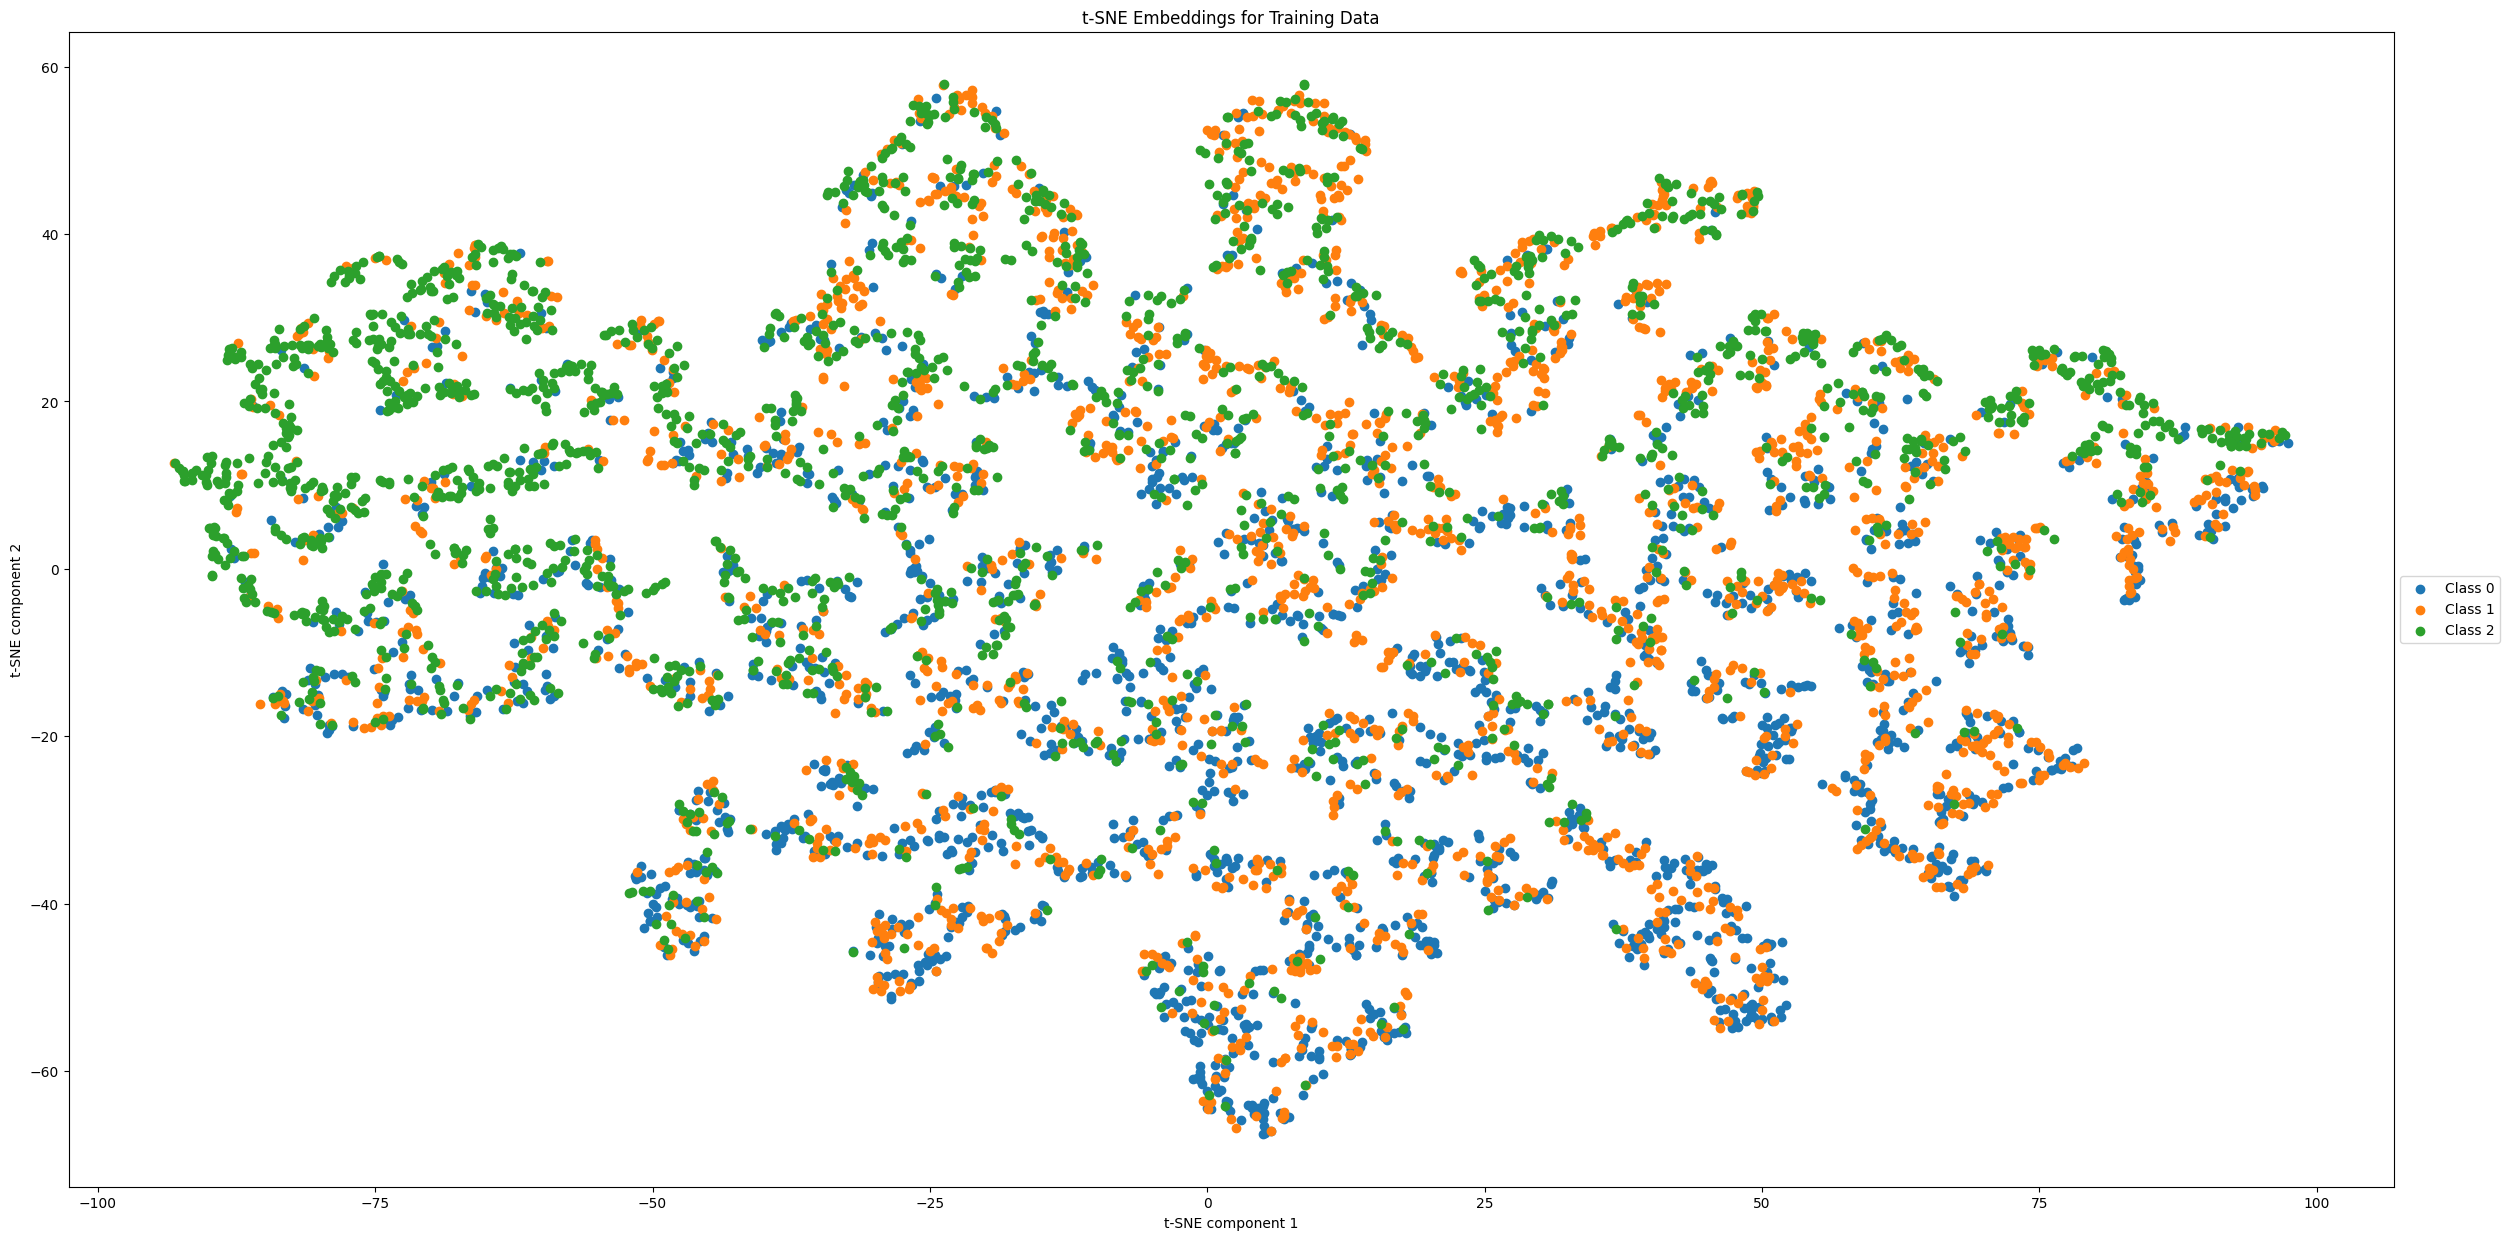

In [65]:
tSNE_plot(model2)

# Output for a specific target

In [63]:
TempTransformer = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(0.1,0.1,0.1),
    transforms.ToTensor(),
    transforms.Normalize([0.554, 0.450, 0.343],[0.231, 0.241, 0.241]),
  ])


from PIL import Image
imageInput = Image.open("/kaggle/input/comp6321-project-datasets/Dataset 1/Dataset 1/Colorectal Cancer /MUS/MUS-AADGLEEQ.tif")
input_data = TempTransformer(imageInput)
input_data = input_data.to(device)
input_data = input_data.unsqueeze(0)
output = model1(input_data)
out=output.tolist()[0]
print(labels_map[out.index(max(out))])
# i=0
# for tempModelList in MODELS3:
#   tempModelList.eval()
#   device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#   tempModelList.to(device)
#   print(" ".join(hyper_parameters3[i]))
#   with torch.no_grad():
#     output = tempModelList(input_data)

#   out=output.tolist()[0]
#   print(labels_map[out.index(max(out))])
#   i=i+1

dog
